In [ ]:
#cuda Version check < Here We are Using 11.8 version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
## Step 2:- Installing Or Importing Pack and lib
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30 # instead of pip install "Pip install opencv-python"

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 

In [ ]:
#   Step 3
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

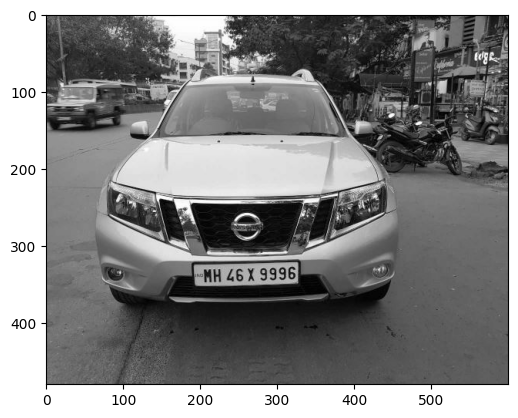

In [ ]:
#  Step 4
#Converting img into GrayScaleFormat
img =cv2.imread('/content/car11.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) # coverting img into gray scale or black & white.
#colored img can more time and effort aslo it pixels count get increased dur to red green blur color


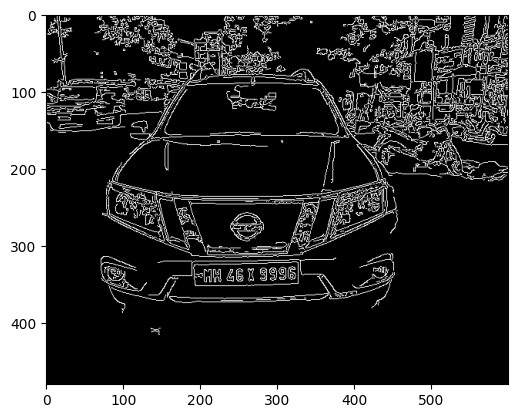

In [ ]:
#apply filter and Edge Detection
bfilter=cv2.bilateralFilter(gray,11 ,17,17) #noise reduction
edged=cv2.Canny(bfilter, 30, 200)# edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
# Finding Countours and applying mask
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 9, True)
    if len(approx) == 4:
        location= approx
        break


In [ ]:
location

array([[[327, 322]],

       [[195, 324]],

       [[193, 351]],

       [[327, 349]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image =cv2.drawContours(mask, [location], 0,195, -1)
new_image =cv2.bitwise_and(img, img, mask=mask)

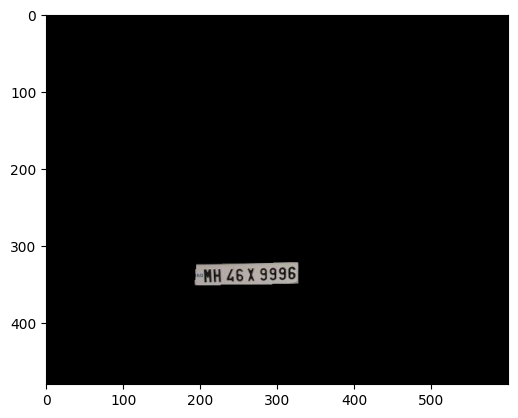

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
#croping the no plate only
(x,y) = np.where(mask==195)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image =gray[x1:x2+1,y1:y2+1]

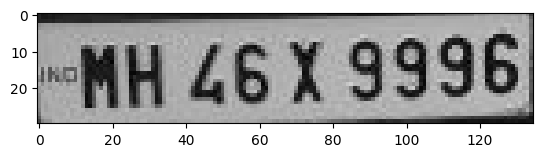

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Using EASYOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[8, 2], [135, 2], [135, 30], [8, 30]], 'MH L6 X 9996', 0.5508177420003281)]